In [152]:
from lxml import html
import time
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
page = requests.get("http://www.baseball-reference.com/teams/BOS/2016.shtml")
tree = html.fromstring(page.content)

In [154]:
links = tree.xpath('//table[@id="team_batting"]//tbody//tr//td[@data-stat="player"]//a')
links = links[:26]

linksText = []
for link in links:
    linksText.append(link.attrib["href"])

In [155]:
allPlayersCareers = {}
columns = ['NAME', 'WAR', 'AB', 'H', 'HR', 'R', 'RBI', 'SB', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+']

'''df = pd.DataFrame({
    'NAME': [],
    'WAR': [],
    'AB': [],
    'H': [],
    'HR': [],
    'R': [],
    'RBI': [],
    'SB': [],
    'BA': [],
    'OBP': [],
    'SLG': [],
    'OPS': [],
    'OPS+': []
})'''

df = pd.DataFrame(columns=columns)

#print(linksText)
count = 0
for link in linksText:
    
    page = requests.get("http://www.baseball-reference.com" + link)
    tree = html.fromstring(page.content)
    
    name = tree.xpath('//div[@itemtype="http://schema.org/Person"]//h1/text()')
    careerStats = tree.xpath('//div[@class="stats_pullout"]')
    
    singleCareer = []
    singleCareer.append(name[0])
    singleCareer.append(careerStats[0][1][0][1].text)
    singleCareer.append(careerStats[0][1][1][1].text)
    singleCareer.append(careerStats[0][1][2][1].text)
    singleCareer.append(careerStats[0][1][3][1].text)
    
    singleCareer.append(careerStats[0][2][0][1].text)
    singleCareer.append(careerStats[0][2][1][1].text)
    singleCareer.append(careerStats[0][2][2][1].text)
    
    singleCareer.append(careerStats[0][3][0][1].text)
    singleCareer.append(careerStats[0][3][1][1].text)
    singleCareer.append(careerStats[0][3][2][1].text)
    singleCareer.append(careerStats[0][3][3][1].text)
    singleCareer.append(careerStats[0][3][4][1].text)
    
    df.loc[count] = singleCareer
    
    count += 1

C:\Users\matth\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


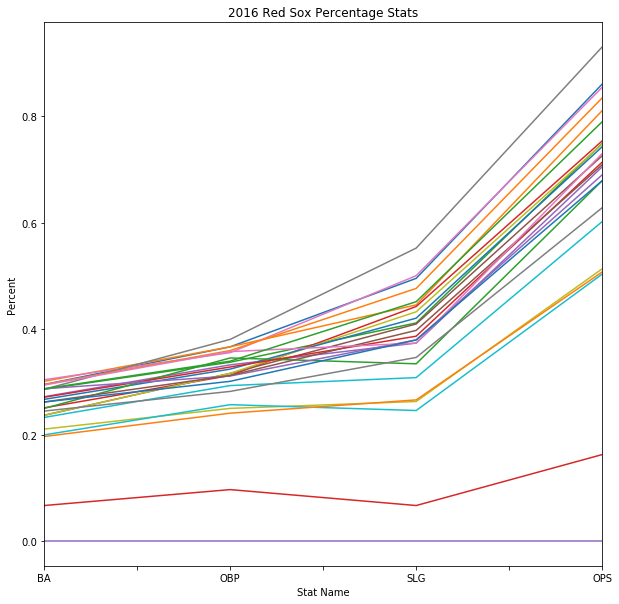

In [196]:
df = df.convert_objects(convert_numeric=True)
df.to_csv("40-Man-Career-Stats.csv", sep=",", index=False)

df_avg = df[['NAME', 'BA', 'OBP', 'SLG', 'OPS']]

plt.clf()

for i in range(1,26):
    df_avg.iloc[i][1:].plot(kind='line', figsize=(10,10), stacked=True, label=df_avg.iloc[i][0])

plt.title('2016 Red Sox Percentage Stats')
plt.xlabel('Stat Name')
plt.ylabel('Percent')
plt.gcf()

C:\Users\matth\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


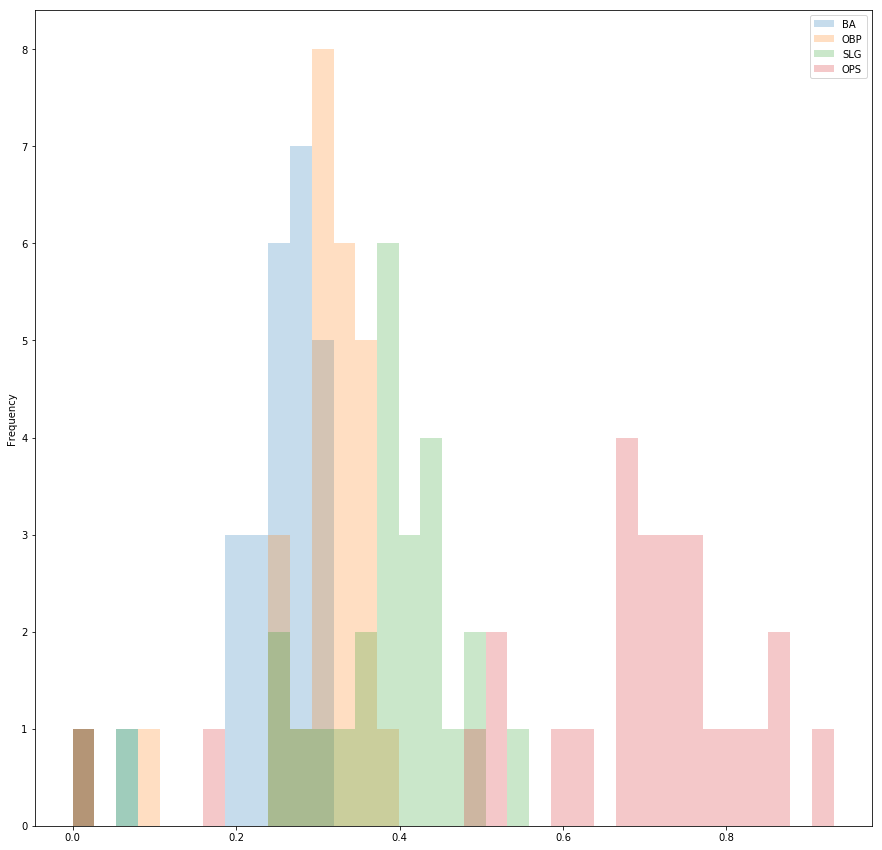

In [189]:
plt.clf()
df_avg.plot.hist(alpha=.25, bins=35, figsize=(15,15))
plt.gcf()

In [190]:
df_avg

,NAME,BA,OBP,SLG,OPS
0,Sandy LeÃ³n,0.254,0.319,0.362,0.681
1,Hanley RamÃ­rez,0.295,0.366,0.495,0.861
2,Dustin Pedroia,0.301,0.366,0.445,0.811
3,Xander Bogaerts,0.286,0.337,0.411,0.749
4,Travis Shaw,0.251,0.312,0.442,0.754
5,Brock Holt,0.272,0.332,0.373,0.705
6,Jackie Bradley,0.237,0.316,0.409,0.726
7,Mookie Betts,0.304,0.355,0.500,0.855
8,David Ortiz,0.286,0.380,0.552,0.931
9,Chris Young,0.237,0.316,0.432,0.748


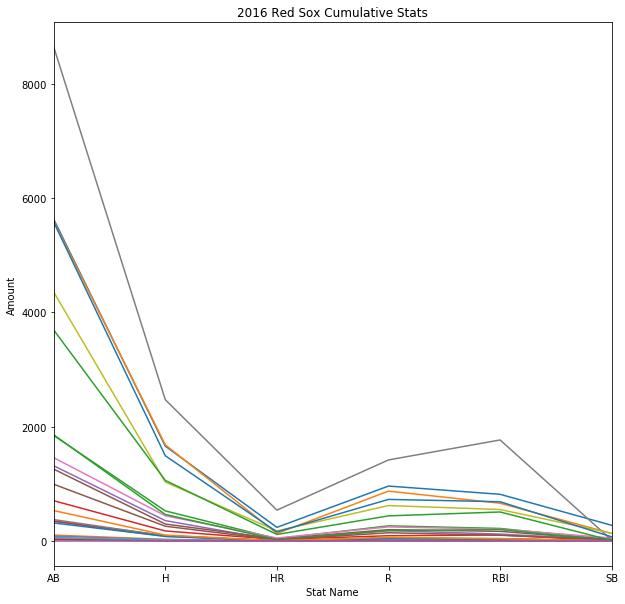

In [197]:
df_cum = df[['NAME', 'AB', 'H', 'HR', 'R', 'RBI', 'SB']]
plt.clf()

for i in range(1,26):
    df_cum.iloc[i][1:].plot(kind='line', figsize=(10,10), stacked=True)

plt.title('2016 Red Sox Cumulative Stats')
plt.xlabel('Stat Name')
plt.ylabel('Amount')
plt.gcf()

In [186]:
df_cum

,NAME,AB,H,HR,R,RBI,SB
0,Sandy LeÃ³n,461,117,8,53,43,0
1,Hanley RamÃ­rez,5627,1660,240,962,818,276
2,Dustin Pedroia,5594,1683,133,874,662,134
3,Xander Bogaerts,1847,528,41,266,221,26
4,Travis Shaw,706,177,29,94,107,5
5,Brock Holt,1317,358,13,184,122,25
6,Jackie Bradley,1258,298,40,200,170,22
7,Mookie Betts,1458,443,54,248,208,54
8,David Ortiz,8640,2472,541,1419,1768,17
9,Chris Young,4354,1033,178,621,552,137
